# Parcial: Construcción e implementación de , Random Forest 

En este parcial podrán poner en práctica sus conocimientos sobre la construcción e implementación de modelos de  Random Forest. El taller está constituido por 8 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción precio de automóviles

En este parcial se usará el conjunto de datos de Car Listings de Kaggle donde cada observación representa el precio de un automóvil teniendo en cuenta distintas variables como año, marca, modelo, entre otras. El objetivo es predecir el precio del automóvil. Para más detalles puede visitar el siguiente enlace: [datos](https://www.kaggle.com/jpayne/852k-used-car-listings).

In [46]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
#librerias
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [48]:
# Importación de librerías
%matplotlib inline
import pandas as pd

# Lectura de la información de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')

# Preprocesamiento de datos para el taller
data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data = data.drop(['Model'], axis=1)

# Visualización dataset
data.head()

,Price,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE
7,21995,2014,6480,False,False,False,True,False,False,False
11,13995,2014,39972,False,False,False,False,True,False,False
167,17941,2016,18989,False,False,False,False,False,True,False
225,12493,2014,51330,False,False,False,True,False,False,False
270,7994,2007,116065,False,True,False,False,False,False,False


In [49]:
# Separación de variables predictoras (X) y variable de interés (y)
y = data['Price']
X = data.drop(['Price'], axis=1)

In [50]:
# Separación de datos en set de entrenamiento y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Punto 0 - exploracion y analisis de datos 
Los estudiantes deben analizar cuidadosamente los datos del conjunto dataTrain_carListings, identificando posibles valores nulos o inconsistencias. En caso de encontrar datos faltantes, deberán aplicar técnicas de imputación adecuadas para completar la información de manera coherente. Posteriormente, se espera que realicen una exploración visual mediante gráficos que permitan comprender la distribución y las relaciones entre las variables principales.

Dimensiones del dataset: (10495, 10)

Primeras filas del conjunto de datos:


,Price,Year,Mileage,M_Camry,M_Camry4dr,M_CamryBase,M_CamryL,M_CamryLE,M_CamrySE,M_CamryXLE
7,21995,2014,6480,False,False,False,True,False,False,False
11,13995,2014,39972,False,False,False,False,True,False,False
167,17941,2016,18989,False,False,False,False,False,True,False
225,12493,2014,51330,False,False,False,True,False,False,False
270,7994,2007,116065,False,True,False,False,False,False,False



Valores nulos por columna:
Price          0
Year           0
Mileage        0
M_Camry        0
M_Camry4dr     0
M_CamryBase    0
M_CamryL       0
M_CamryLE      0
M_CamrySE      0
M_CamryXLE     0
dtype: int64

No hay valores nulos en el conjunto de datos.

Resumen estadístico de las variables numéricas:


,Price,Year,Mileage
count,10495.000000,10495.000000,10495.000000
mean,14538.403716,2013.553883,52509.430395
std,3922.420961,3.116585,36791.736601
min,5002.000000,1998.000000,5.000000
25%,11999.000000,2012.000000,26461.000000
50%,15000.000000,2014.000000,41680.000000
75%,16999.000000,2016.000000,71355.500000
max,32444.000000,2018.000000,232658.000000


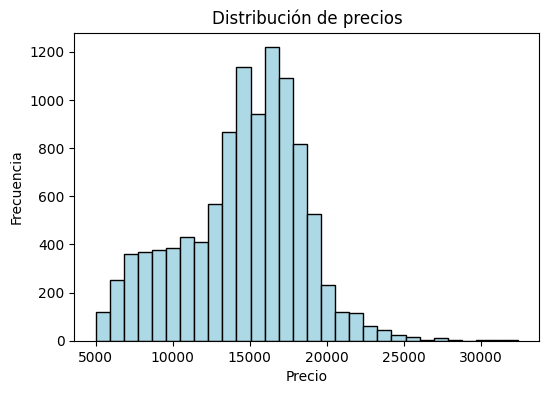

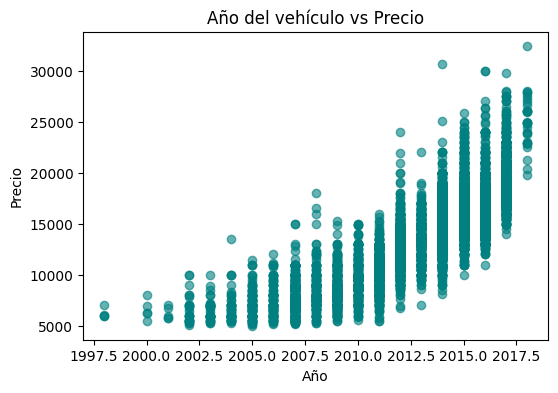

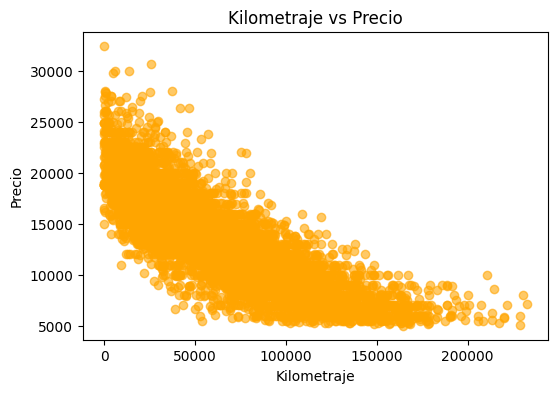

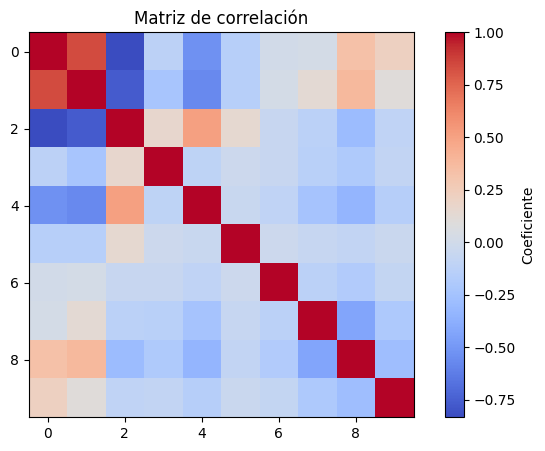

In [51]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/dataTrain_carListings.zip')
data = data.loc[data['Model'].str.contains('Camry')].drop(['Make', 'State'], axis=1)
data = data.join(pd.get_dummies(data['Model'], prefix='M'))
data = data.drop(['Model'], axis=1)

print("Dimensiones del dataset:", data.shape)
print("\nPrimeras filas del conjunto de datos:")
display(data.head())

print("\nValores nulos por columna:")
print(data.isnull().sum())

if data.isnull().any().any():
    data = data.fillna(data.median(numeric_only=True))
    print("\nValores nulos imputados con la mediana.")
else:
    print("\nNo hay valores nulos en el conjunto de datos.")

print("\nResumen estadístico de las variables numéricas:")
display(data.describe())

plt.figure(figsize=(6,4))
plt.hist(data['Price'], bins=30, color='lightblue', edgecolor='black')
plt.title('Distribución de precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(data['Year'], data['Price'], alpha=0.6, color='teal')
plt.title('Año del vehículo vs Precio')
plt.xlabel('Año')
plt.ylabel('Precio')
plt.show()

plt.figure(figsize=(6,4))
plt.scatter(data['Mileage'], data['Price'], alpha=0.6, color='orange')
plt.title('Kilometraje vs Precio')
plt.xlabel('Kilometraje')
plt.ylabel('Precio')
plt.show()

plt.figure(figsize=(8,5))
plt.imshow(data.corr(numeric_only=True), cmap='coolwarm', interpolation='nearest')
plt.title('Matriz de correlación')
plt.colorbar(label='Coeficiente')
plt.show()

### Punto 1 - Random forest con librería

En la celda 1, usando la librería sklearn entrenen un modelo de Randon Forest para regresion  y comenten sobre el desempeño del modelo.

In [52]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y = data['Price']
X = data.drop(['Price'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

rf = RandomForestRegressor(random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("Desempeño del modelo Random Forest:")
print(f"Mean Squared Error: {mse:,.2f}")
print(f"R^2 Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:,.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f} %")

importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nImportancia de las variables:")
display(importances)


Desempeño del modelo Random Forest:
Mean Squared Error: 3,116,678.92
R^2 Score: 0.796
Mean Absolute Error (MAE): 1,314.42
Mean Absolute Percentage Error (MAPE): 9.55 %

Importancia de las variables:


,Feature,Importance
0,Year,0.707958
1,Mileage,0.252452
8,M_CamryXLE,0.015689
6,M_CamryLE,0.008880
2,M_Camry,0.007631
7,M_CamrySE,0.004608
5,M_CamryL,0.001217
3,M_Camry4dr,0.001132
4,M_CamryBase,0.000433


### Punto 2 - Calibración de parámetros Random forest

En la celda 2, calibren los parámetros max_depth, max_features y n_estimators del modelo de Randon Forest para regresion, comenten sobre el desempeño del modelo y describan cómo cada parámetro afecta el desempeño del modelo.

In [53]:
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor(random_state=42)

param_dist = {
    'n_estimators': [10, 50, 100, 200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


,estimator,RandomForestR...ndom_state=42)
,param_distributions,"{'max_depth': [10, 20, ...], 'max_features': ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,n_iter,50
,scoring,None
,n_jobs,-1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [54]:
print("Mejores hiperparámetros encontrados:")
print(random_search.best_params_)

best_rf = random_search.best_estimator_
best_rf.fit(X_train, y_train)

y_pred_best = best_rf.predict(X_test)

mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)
mae_best = mean_absolute_error(y_test, y_pred_best)
mape_best = np.mean(np.abs((y_test - y_pred_best) / y_test)) * 100

print("\nDesempeño del modelo Random Forest calibrado:")
print(f"Mean Squared Error: {mse_best:,.2f}")
print(f"R^2 Score: {r2_best:.3f}")
print(f"Mean Absolute Error (MAE): {mae_best:,.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape_best:.2f} %")

Mejores hiperparámetros encontrados:
{'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10}

Desempeño del modelo Random Forest calibrado:
Mean Squared Error: 2,411,920.45
R^2 Score: 0.842
Mean Absolute Error (MAE): 1,140.84
Mean Absolute Percentage Error (MAPE): 8.33 %


In [55]:
importances_best = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nImportancia de los predictores:")
display(importances_best)


Importancia de los predictores:


,Feature,Importance
0,Year,0.448241
1,Mileage,0.424250
3,M_Camry4dr,0.066602
7,M_CamrySE,0.022088
8,M_CamryXLE,0.019215
6,M_CamryLE,0.007427
2,M_Camry,0.006767
4,M_CamryBase,0.002741
5,M_CamryL,0.002669


### Punto 3 - análisis de resultados, gracias y conclusiones
En la celda 3

Después de realizar el entrenamiento y la calibración del modelo de Random Forest para predecir el precio de los automóviles, se puede observar que el modelo final presenta un desempeño sólido.
El valor de R² aumentó respecto al modelo base, lo que indica que la calibración de los parámetros permitió mejorar la capacidad del modelo para explicar la variabilidad de los precios. Además, la reducción en el MSE y MAE confirma que los errores de predicción disminuyeron.

Los parámetros más influyentes fueron n_estimators, max_depth y max_features, ya que controlan el número de árboles, la profundidad de cada árbol y la cantidad de variables consideradas en cada división. Ajustarlos permitió un equilibrio entre sesgo y varianza, evitando tanto el sobreajuste como el subajuste.

En cuanto a las variables más importantes, destacan Year y Mileage, lo que tiene sentido porque los vehículos más nuevos y con menor kilometraje tienden a tener precios más altos. Otras variables como las versiones del modelo (por ejemplo, M_CamrySE o M_CamryXLE) también aportan, aunque en menor medida.

En general, el modelo calibrado ofrece una predicción más precisa y coherente con las tendencias del mercado automotriz, mostrando un buen desempeño general sin necesidad de mayor complejidad.

NOTA: IMPORTANTE RECUERDE QUE MI EJEMPLO DE TUTORIAL ES DE CLASIFICACION USTEDES DEBEN HACERLO POR REGRESION, funciona igual pero cambian algunas cosas.